# Data analysis on Titanic dataset

## Titanic: data preprocessing and imputation

Data is downloaded from [Titanic dataset](https://www.kaggle.com/c/titanic) from Kaggle.

The dataset consists of personal information of all the passengers on board the Titanic, along with the information whether they survived the iceberg collision or not.

In [33]:
# Imports
import numpy as np
import pandas as pd

# Reading csv data
titanic = pd.read_csv('train.csv')
titanic.shape

(891, 12)

In [34]:
# Removing unnecessary columns
titanic = titanic.drop(columns = ['Name', 'PassengerId', 'Ticket'])
titanic.shape

(891, 9)

In [35]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [36]:
# Taking Cabin's first letter and making it the Deck. 
# Those without a letter shall be NaN. Then removing Cabin because it is an unnecessary column.
titanic["Deck"] = titanic["Cabin"].str[0]
titanic = titanic.drop("Cabin", axis = 1)
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [37]:
# Now we transform categorical values to numerical values
categorical_values = ["Sex", "Embarked", "Deck"]

for val in categorical_values:
    titanic[val] = titanic[val].astype('category')

cat_columns = titanic.select_dtypes(['category']).columns
titanic[cat_columns] = titanic[cat_columns].apply(lambda x: x.cat.codes)

titanic.replace(-1, np.NaN, inplace=True) # NaNs were labeled as -1

titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2.0,NaN
1,1,1,0,38.0,1,0,71.2833,0.0,2.0
2,1,3,0,26.0,0,0,7.9250,2.0,NaN
3,1,1,0,35.0,1,0,53.1000,2.0,2.0
4,0,3,1,35.0,0,0,8.0500,2.0,NaN


## Imputation
Machine learning algorithm have problems with missing values so I'll fill them with means and median. (This is not the best way to fill missing values.)

In [38]:
# Continuous variables imputation
for val in ["Age", "Fare", "Pclass", "SibSp"]:
    titanic[val].fillna(titanic[val].mean(), inplace=True)

# Categorical variables imputation
for val in categorical_values:
    titanic[val].fillna(titanic[val].median(), inplace=True)
# Printing means and medians
for val in ["Age", "Fare", "Pclass", "SibSp"]:
    print(val,": ",titanic[val].mean())
for val in categorical_values:
    print(val,": ",titanic[val].median()) 

titanic.head(5)

Age :  29.69911764705882
Fare :  32.204207968574636
Pclass :  2.308641975308642
SibSp :  0.5230078563411896
Sex :  1.0
Embarked :  2.0
Deck :  2.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2.0,2.0
1,1,1,0,38.0,1,0,71.2833,0.0,2.0
2,1,3,0,26.0,0,0,7.9250,2.0,2.0
3,1,1,0,35.0,1,0,53.1000,2.0,2.0
4,0,3,1,35.0,0,0,8.0500,2.0,2.0


In [39]:
titanic.to_csv('titanic.csv')
titanic.to_json('titanic.json', orient = 'table')

## Exploratory data analysis

Now we will study the cleaned data above with exploratory data analysis.

In [40]:
print(titanic.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck'],
      dtype='object')


In [126]:
femalecount = titanic[titanic["Sex"] == 0].count()[0]
malecount = titanic[titanic["Sex"] == 1].count()[0]
survcount = titanic[titanic["Survived"]== 1].count()[0]
nonsurvcount = titanic[titanic["Survived"]== 0].count()[0]

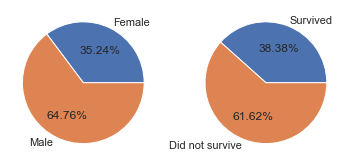

In [135]:
from matplotlib import pyplot as plt2
fig, (axs1, axs2) = plt.subplots(1,2)
axs1.pie([femalecount, malecount], labels = ['Female', 'Male'],autopct='%1.2f%%');
axs2.pie([survcount, nonsurvcount], labels = ['Survived', 'Did not survive'],autopct='%1.2f%%');


In [41]:
import statistics as st
# medians of continous variables and modes of categorical variables to make an average human on board.
mSurvived = st.mode(titanic['Survived'])
mPclass = st.mode(titanic['Pclass'])
mSex = st.mode(titanic['Sex'])
mAge = np.mean(titanic['Age'])
mSibSp = np.mean(titanic['SibSp'])
mParch = np.mean(titanic['Parch'])
mFare = np.mean(titanic['Fare'])
mEmbarked = st.mode(titanic['Embarked'])
mDeck = st.mode(titanic['Deck'])

average = [mSurvived, mPclass, mSex, mAge, mSibSp, mParch, mFare,
       mEmbarked, mDeck]
average

[0,
 3,
 1,
 29.69911764705882,
 0.5230078563411896,
 0.38159371492704824,
 32.204207968574636,
 2.0,
 2.0]

2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”. 

    <span style="background-color: #ccfff2">*Hint: What are the average/most frequent variable values for a non-survivor?*</span>

In [44]:
# average survivor/non-survivor

aPclass = st.mode(titanic[titanic['Survived'] == 1]['Pclass'])
aSex = st.mode(titanic[titanic['Survived'] == 1]['Sex'])
aAge = np.mean(titanic[titanic['Survived'] == 1]['Age'])
aSibSp = np.mean(titanic[titanic['Survived'] == 1]['SibSp'])
aParch = np.mean(titanic[titanic['Survived'] == 1]['Parch'])
aFare = np.mean(titanic[titanic['Survived'] == 1]['Fare'])
aEmbarked = st.mode(titanic[titanic['Survived'] == 1]['Embarked'])
aDeck = st.mode(titanic[titanic['Survived'] == 1]['Deck'])
avg_surv = [aPclass, aSex, aAge, aSibSp, aParch, aFare,
       aEmbarked, aDeck]

nPclass = st.mode(titanic[titanic['Survived'] == 0]['Pclass'])
nSex = st.mode(titanic[titanic['Survived'] == 0]['Sex'])
nAge = np.mean(titanic[titanic['Survived'] == 0]['Age'])
nSibSp = np.mean(titanic[titanic['Survived'] == 0]['SibSp'])
nParch = np.mean(titanic[titanic['Survived'] == 0]['Parch'])
nFare = np.mean(titanic[titanic['Survived'] == 0]['Fare'])
nEmbarked = st.mode(titanic[titanic['Survived'] == 0]['Embarked'])
nDeck = st.mode(titanic[titanic['Survived'] == 0]['Deck'])
avg_nonsurv = [nPclass, nSex, nAge, nSibSp, nParch, nFare,
    nEmbarked, nDeck]

In [46]:
print("Average survivor: ", avg_surv)
print("Average non-survivor: ", avg_nonsurv)
# 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Deck'

Average survivor:  [1, 0, 28.549778121775027, 0.47368421052631576, 0.4649122807017544, 48.39540760233918, 2.0, 2.0]
Average non-survivor:  [3, 1, 30.415099646415943, 0.5537340619307832, 0.3296903460837887, 22.117886885245902, 2.0, 2.0]


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group? 

    <span style="background-color: #ccfff2">*Note: You are free to choose your methods: non-graphical/graphical, static/interactive - anything goes.*</span>

In [53]:
avg_surv[2]

28.549778121775027

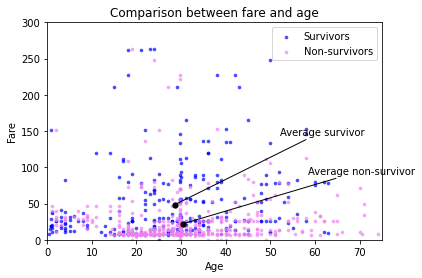

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')


plt.axvspan(76, 76, facecolor='g', alpha=1)
plt.annotate('Average survivor', xy=(avg_surv[2], avg_surv[5]), xytext=(105,70),
xycoords='data',textcoords='offset points',arrowprops=dict(arrowstyle="-"))

plt.annotate('Average non-survivor', xy=(avg_nonsurv[2], avg_nonsurv[5]), xytext=(125, 50),
xycoords='data',textcoords='offset points',arrowprops=dict(arrowstyle="-"))

surv = titanic[titanic["Survived"] == 1]
non_surv = titanic[titanic["Survived"] == 0]

plt.scatter(surv['Age'], surv['Fare'], s=13, marker='o', c='blue', lw=0, alpha=0.7, label='Survivors')
plt.scatter(non_surv['Age'], non_surv['Fare'], s=13, marker='o', c='violet', lw=0, alpha=0.7, label = 'Non-survivors')
plt.scatter(avg_surv[2], avg_surv[5], s=40, marker='o', c='k', lw=0)
plt.scatter(avg_nonsurv[2], avg_nonsurv[5], s=40, marker='o', c='k', lw=0)
plt.title("Comparison between fare and age")
plt.legend(loc="upper right")
plt.xlim((0,75))
plt.ylim((0,300))
plt.show()

4. To give a more complete picture of the two groups (survivor/non-survivor), provide graphical displays of the distribution of the variables in each group whenever appropriate (not, e.g., on the ticket number).

Text(0.5, 1.08, 'Age and fare variables in pairplot, hue = Survived')

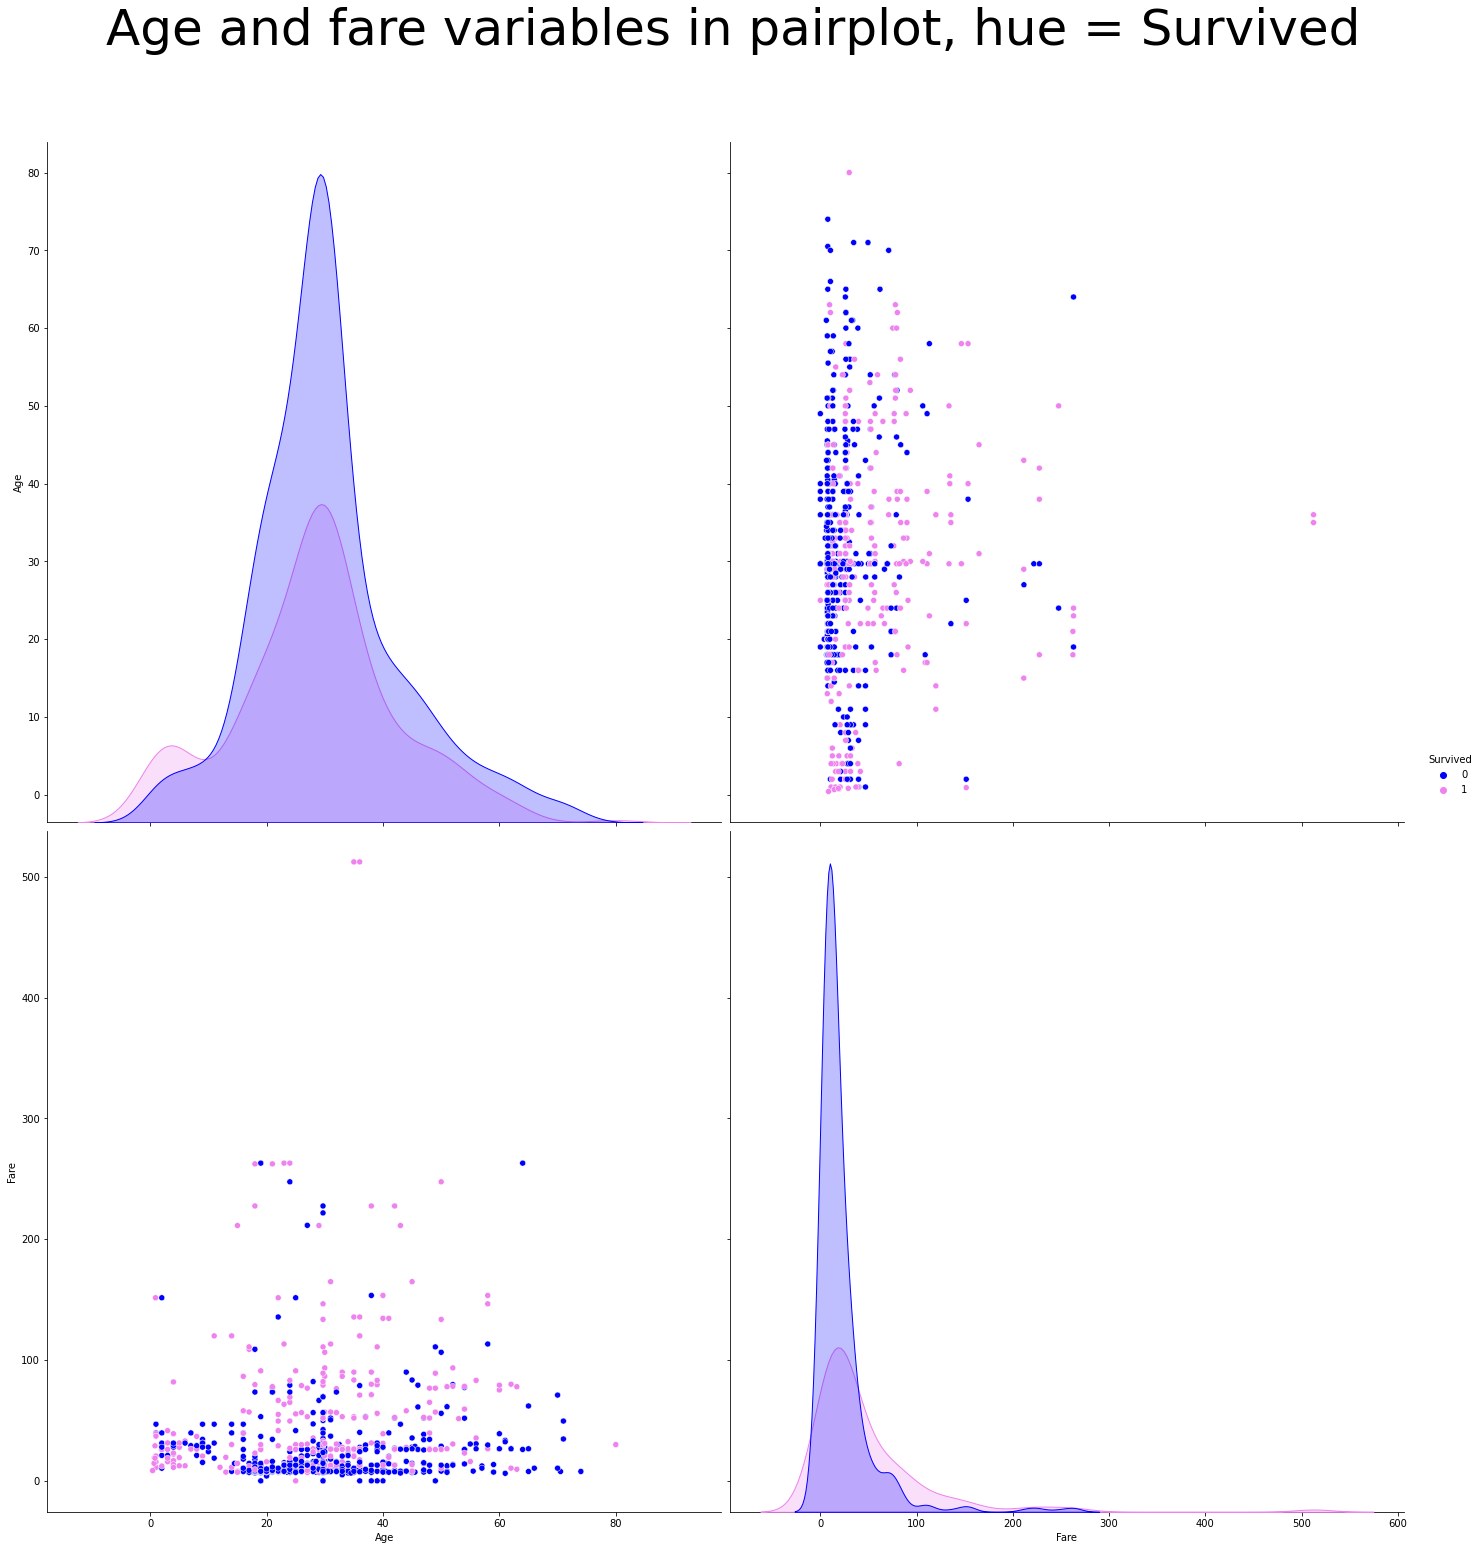

In [75]:
import seaborn as sns

plot = sns.pairplot(titanic[['Survived','Age', 'Fare']], hue = "Survived", palette = ["blue", "violet"], diag_kind = "kde", height = 10)
plot.fig.suptitle("Age and fare variables in pairplot, hue = Survived", y = 1.08,fontsize=50)

Text(0.5, 1.08, 'Age and fare variables in pairplot, hue = Sex')

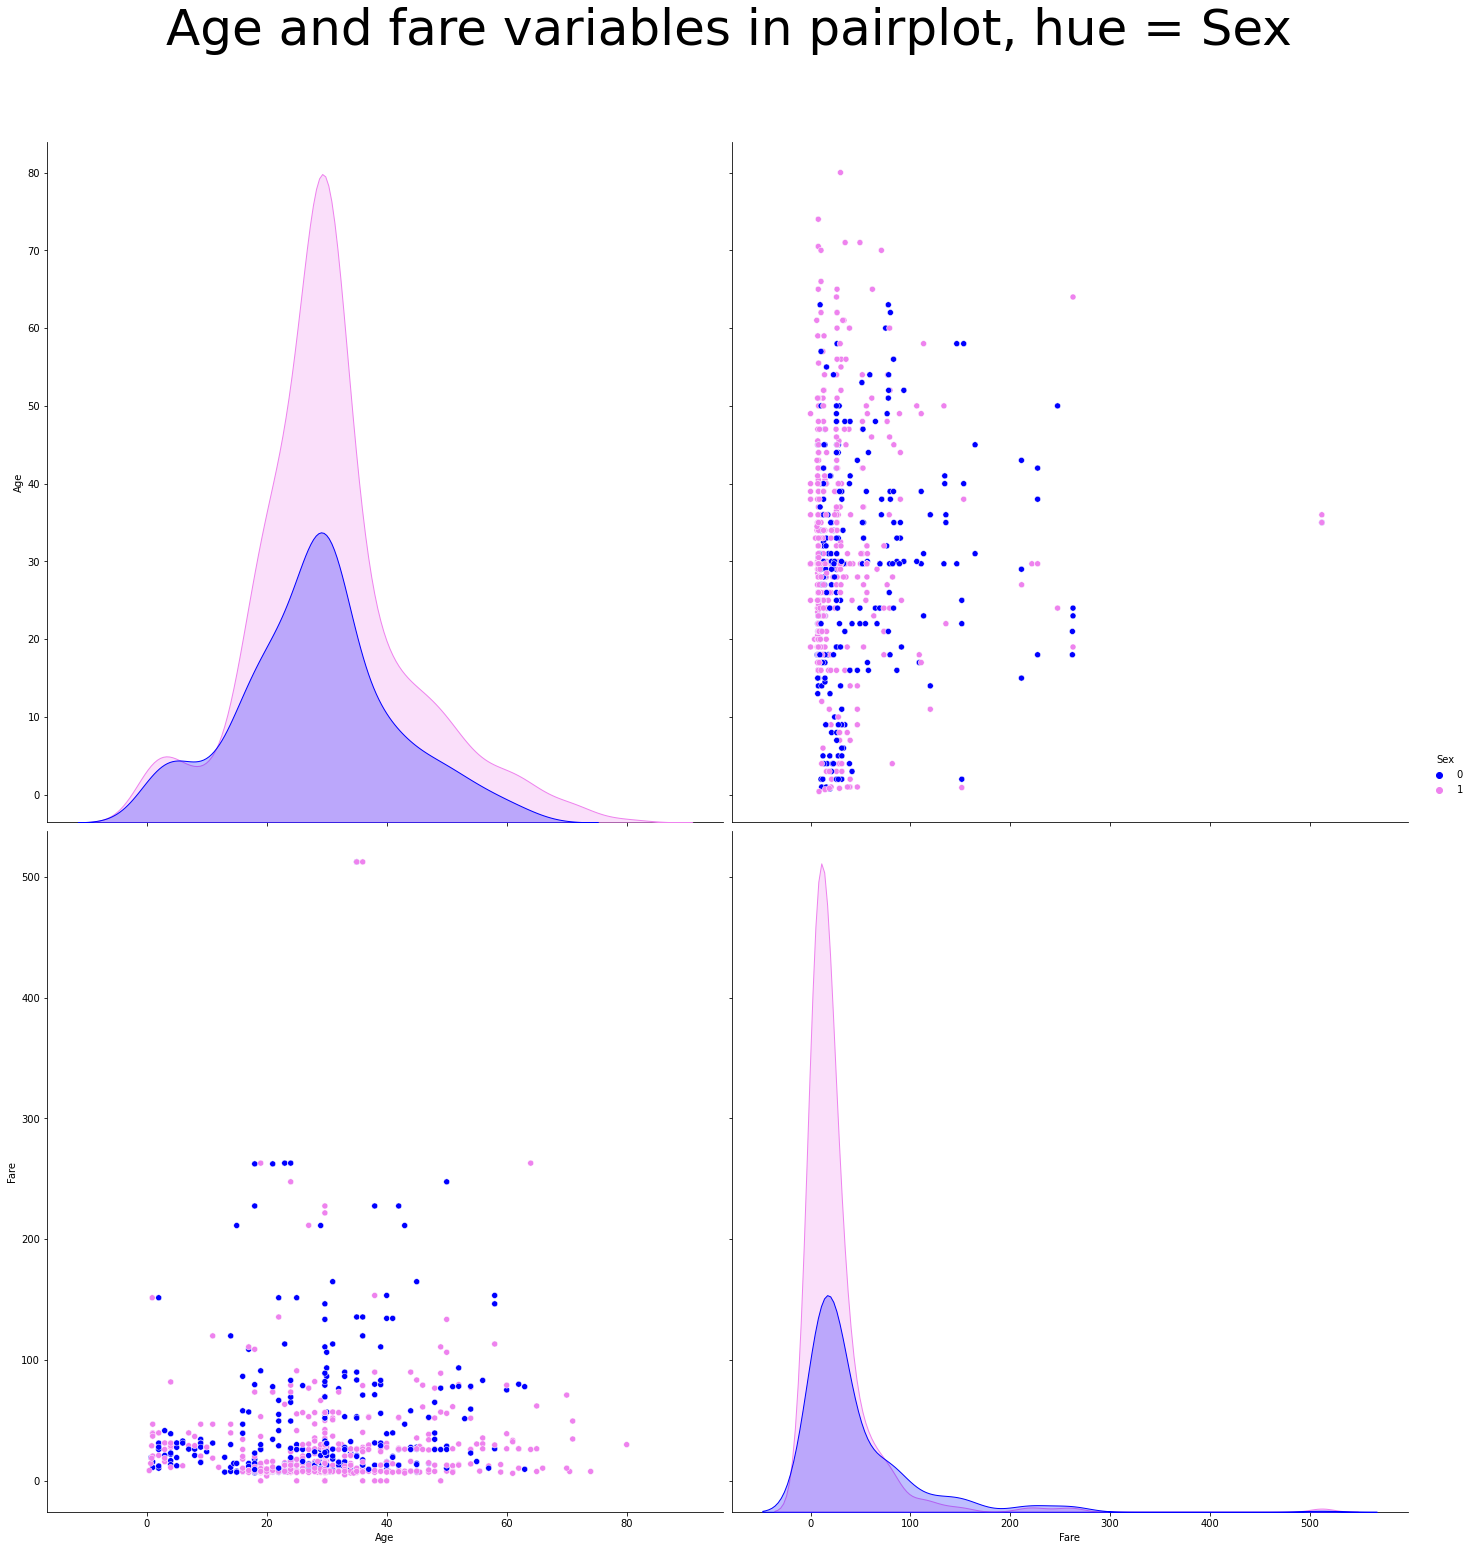

In [102]:
plot = sns.pairplot(titanic[['Sex','Age', 'Fare']], hue = "Sex", palette = ["blue", "violet"], diag_kind = "kde", height = 10)
plot.fig.suptitle("Age and fare variables in pairplot, hue = Sex", y = 1.08, fontsize = 50)


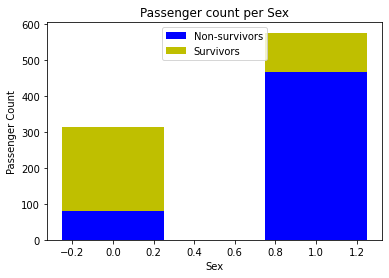

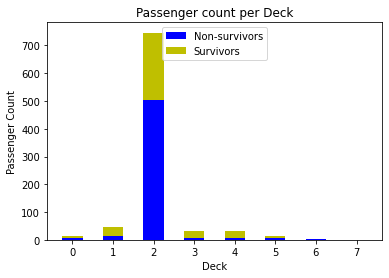

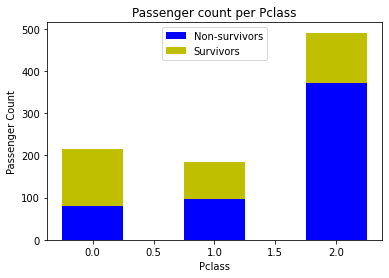

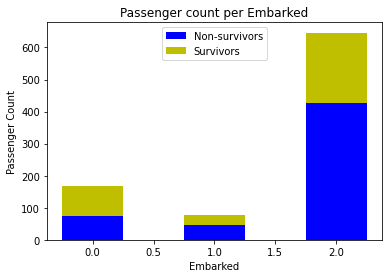

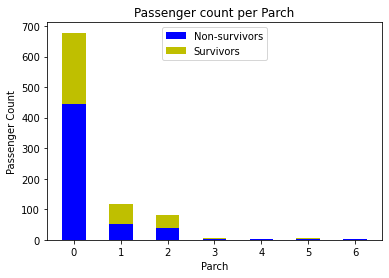

In [108]:
# Now we visualize categorical variables.
def visualize_cat(x):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(x)
    
    ax.set_ylabel('Passenger Count')

    tb = pd.pivot_table(data=titanic, values='Age', index=x, columns='Survived', aggfunc='count')
    bar1=tb[0]
    bar2=tb[1]
    
    i = np.arange(len(bar1))
    firstb = plt.bar(i, bar1, 0.5, color='b', label = 'Non-survivors')
    secondb = plt.bar(i, bar2, 0.5, color='y', bottom=bar1, label = 'Survivors')

    plt.title('Passenger count per ' + x)
    plt.legend(loc = 'upper center')
    plt.show()

# 0 (left) is male and 1 (right) is female
visualize_cat('Sex')
visualize_cat('Deck')
visualize_cat('Pclass')
visualize_cat('Embarked')
visualize_cat('Parch')

In [137]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.080643
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098,0.009851
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262,-0.070780
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,-0.034560
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,0.000224
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.018232
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,-0.098064
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,0.102086
Deck,0.080643,0.009851,-0.070780,-0.034560,0.000224,0.018232,-0.098064,0.102086,1.000000


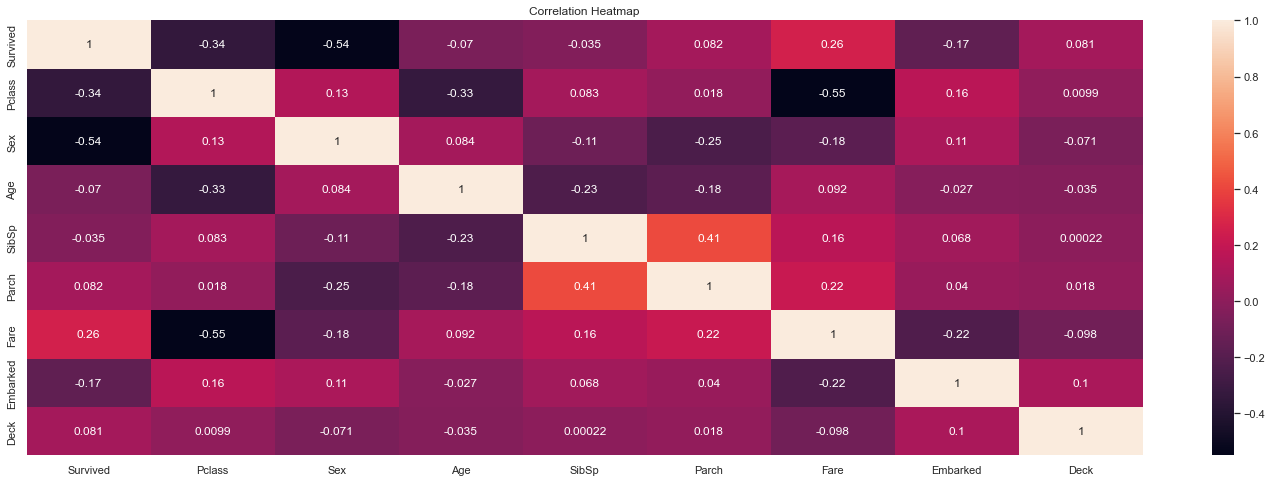

In [139]:
plt.figure(figsize=(25,8))
heatmap = sns.heatmap(titanic.corr(),annot= True)
heatmap.set_title('Correlation Heatmap');

## Supervised Machine Learning models and their accuracy

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [184]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
713,3,1,29.0,0,0,9.4833,2.0,2.0
714,2,1,52.0,0,0,13.0000,2.0,2.0
715,3,1,19.0,0,0,7.6500,2.0,5.0
716,1,0,38.0,0,0,227.5250,0.0,2.0
717,2,0,27.0,0,0,10.5000,2.0,4.0


In [166]:
#Small calculation for 80/20 train test split
titanic.shape, 891/100*80,891/100*20

((891, 9), 712.8, 178.2)

In [167]:
# Prepare data for models.
# Splitting the Titanic data 80/20 train test
x_train = titanic.drop(labels = "Survived", axis = 1)[0:712]
y_train = titanic["Survived"][0:712]
x_test = titanic.drop("Survived", axis = 1)[713:890]

### Logistic regression
Logistic regression is also known as maximum-entropy classification (MaxEnt), logit regression or the log-linear classifier is a linear model for classification using logistic function.

In [189]:
#Logistic regression
logr = LogisticRegression( max_iter=1000)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
accuracy_logr = round(logr.score(x_train, y_train) * 100, 2)
accuracy_logr

79.49

In [172]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_svc = round(svc.score(x_train, y_train)*100,2)
accuracy_svc

67.84

In [175]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn = round(knn.score(x_train, y_train)*100,2)
accuracy_knn

78.65

In [176]:
gaus = GaussianNB()
gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
accuracy_gaus = round(gaus.score(x_train, y_train)*100,2)
accuracy_gaus

79.21

In [177]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
accuracy_perceptron = round(perceptron.score(x_train, y_train)*100,2)
accuracy_perceptron

62.36

In [179]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
accuracy_linear_svc = round(linear_svc.score(x_train, y_train)*100,2)
accuracy_linear_svc

c:\users\lamth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.35

In [180]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
accuracy_sgd = round(sgd.score(x_train, y_train)*100,2)
accuracy_sgd

70.08

In [181]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
accuracy_decision_tree = round(decision_tree.score(x_train, y_train)*100,2)
accuracy_decision_tree

98.46

In [182]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy_random_forest = round(random_forest.score(x_train, y_train)*100,2)
accuracy_random_forest

98.46

In [183]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [accuracy_svc, accuracy_knn,accuracy_logr,accuracy_random_forest,accuracy_gaus,
              accuracy_perceptron,accuracy_sgd,accuracy_linear_svc,accuracy_decision_tree]})
models.sort_values(by = "Score", ascending=False)


,Model,Score
3,Random Forest,98.46
8,Decision Tree,98.46
2,Logistic Regression,79.49
7,Linear SVC,79.35
4,Naive Bayes,79.21
1,KNN,78.65
6,Stochastic Gradient Decent,70.08
0,Support Vector Machines,67.84
5,Perceptron,62.36


6. Finally, recall the preprocessing we did in the first exercise. Can you say something about the effect of the choices that were made, in particular, to use the mode or the mean to impute missing values, instead of, for example, ignoring passengers with missing data?

We should be very careful when choosing to impute missing data. Sometimes it can make big changes to the outcome of the analysis, for example if there are a lot of missing data. In this case it wasn't that big of a deal.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**